# Lab 4: Feature Selection - Wrapper Method & Embedded Method

 <h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

 <h2 style="text-align: center;">Registration number: 2448040 </h2>

### Importing libraries:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

### Loading the california dataset:

In [35]:
data=fetch_california_housing()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target

### Exploratory Data Analysis(EDA):

In [36]:
print("Dataset Information: \n")
X.info()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [37]:
print("Summary Statistics: \n")
X.describe()

Summary Statistics: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [38]:
print("Checking missing values: \n")
X.isnull().sum()

Checking missing values: 



MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Interpretation: There is no missing values in the dataset

### Correlation heatmap:

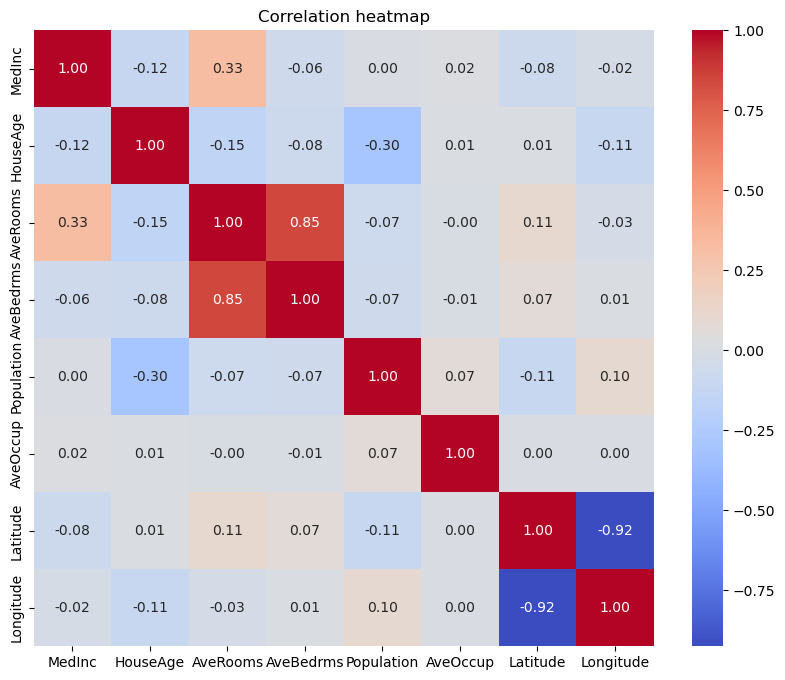

In [39]:
plt.figure(figsize=(10,8))
correlation_matrix=X.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation heatmap")
plt.show()

In [40]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
test_size=0.2, random_state=42)
# Function to Train and Evaluate Model
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse
# Train a model using ALL features (Baseline)
mse_all_features = evaluate_model(X_train, X_test, y_train, y_test)
print(f"MSE with All Features: {mse_all_features:.4f}")

MSE with All Features: 0.5559


Interpretation:  This means, on average, the squared difference between predicted and actual values is 0.5559.
 This serves as a reference for comparing feature selection techniques

Wrapper method: Wrapper methods use a machine learning model to select features by evaluating their impact on performance

## (a)Forward Selection:

Starts with no features.
Adds features one by one that improve the model the most.
Stops when adding more features does not improve performance.

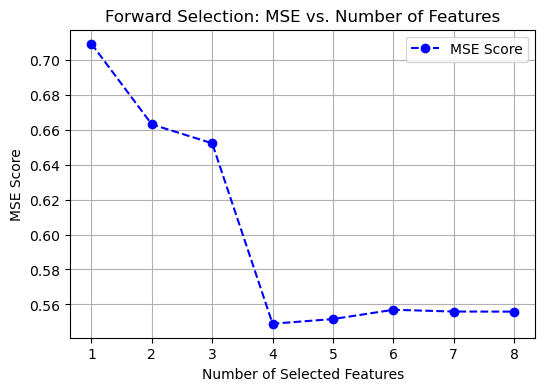

In [41]:
# Plot MSE vs. Number of Features
model= LinearRegression()
mse_values = []
num_features = []
for k in range(1, X_train.shape[1] + 1):  # Test for 1 to all features
    sfs_k = SFS(model, k_features=k, forward=True, floating=False, 
                scoring='neg_mean_squared_error', cv=5)
    sfs_k.fit(X_train, y_train)
    
    X_train_k = sfs_k.transform(X_train)
    X_test_k = sfs_k.transform(X_test)
    
    mse = evaluate_model(X_train_k, X_test_k, y_train, y_test)
    mse_values.append(mse)
    num_features.append(k)
# Plotting
plt.figure(figsize=(6, 4))
plt.plot(num_features, mse_values, marker="o", linestyle="--", color="blue", label="MSE Score")
plt.xlabel("Number of Selected Features")
plt.ylabel("MSE Score")
plt.title("Forward Selection: MSE vs. Number of Features")
plt.legend()
plt.grid()
plt.show()

We test different numbers of selected features from 1 to all features.
Train Model & Compute MSE , for each feature count, we: <br>
(i) Select the best features using Forward Selection (sfs). Train the model using only those features. Calculate MSE (error) and store it.<br>
(ii) Plot MSE vs. Number of Features. This shows how model performance changes as we add or remove features.

In [42]:
 sfs = SFS(model, k_features=4, forward=True, floating=False,
           scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)
X_train_fs =sfs.transform(X_train)
X_test_fs =sfs.transform(X_test)
mse_forward =evaluate_model(X_train_fs, X_test_fs, y_train, y_test)
print(f"MSE with Forward Selection: {mse_forward:.4f}")

MSE with Forward Selection: 0.5490


Better than the base MSE <br>
This means removing some features improved the model slightly. Suggests that not all features were 
useful.

## (b) Backward Elimination:

Starts with all features in the model.
Removes the least important feature one by one, based on the effect on model performance.
Stops when removing another feature would increase the error (MSE)

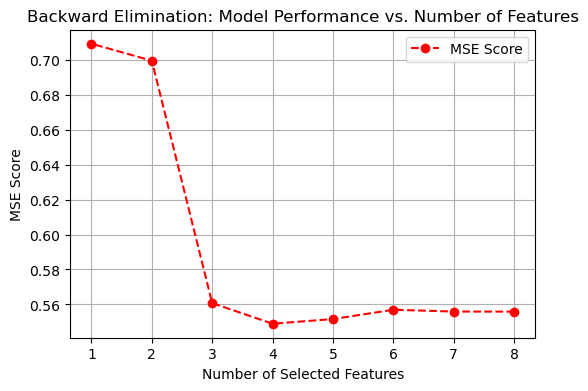

In [43]:
# Store MSE values for different numbers of selected features
mse_values = []
num_features = []
for k in range(X_train.shape[1], 0, -1):  
    sbs = SFS(model, k_features=k, forward=False, floating=False, 
              scoring='neg_mean_squared_error', cv=5)
    sbs.fit(X_train, y_train)
    
    # Transform dataset with selected features
    X_train_bs = sbs.transform(X_train)
    X_test_bs = sbs.transform(X_test)
    
    # Compute MSE and store results
    mse = evaluate_model(X_train_bs, X_test_bs, y_train, y_test)
    mse_values.append(mse)
    num_features.append(k)
# Plot MSE vs. Number of Features for Backward Elimination
plt.figure(figsize=(6, 4))
plt.plot(num_features, mse_values, marker="o", linestyle="--", 
         color="red", label="MSE Score")
plt.xlabel("Number of Selected Features")
plt.ylabel("MSE Score")
plt.title("Backward Elimination: Model Performance vs. Number of Features")
plt.legend()
plt.grid()
plt.show()

The model begins with all available features.
Remove Least Important Features :
It removes one feature at a time, starting with the least important one. The removal is based on how much the feature contributes to reducing error (MSE).
Train Model & Compute MSE , for each feature count, we :
Select the best features using Backward Elimination (sbs). Train the model using only those selected features. Calculate MSE (error) and store it.
Plot MSE vs. Number of Features showing how model performance changes as we remove features. 
Find the Optimal Features the ones where MSE is the lowest.

In [44]:
sbs =SFS(model, k_features=4, forward=False, 
         scoring='neg_mean_squared_error' , cv=5)
sbs.fit(X_train, y_train)
X_train_bs = sbs.transform(X_train)
X_test_bs = sbs.transform(X_test) 
mse_backward =evaluate_model(X_train_bs, X_test_bs, y_train, y_test)
print(f"MSE with Backward Elimination: {mse_backward:.4f}")

MSE with Backward Elimination: 0.5490


MSE: 0.5490 (Better than baseline)
This means removing some features improved the model slightly. Suggests that not all features were useful.

## Embedded method:

Embedded methods select features during model training by applying built-in regularization 
techniques (e.g., LASSO shrinks coefficients, dropping less important features).
They are faster than wrapper methods and prevent overfitting.

## (a) Lasso Regression:

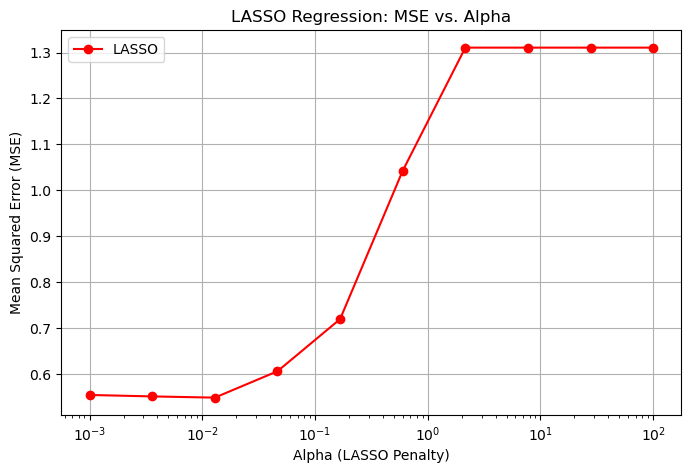

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Define alpha values (log scale for better visualization)
alpha_values = np.logspace(-3, 2, 10)  # From 0.001 to 100
mse_values = []
# Loop through different alpha values
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
# Find the best alpha (minimum MSE)
best_alpha = alpha_values[np.argmin(mse_values)]
# Plot Alpha vs. MSE for LASSO
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, mse_values, marker='o', linestyle='-', 
         color='r', label="LASSO")
plt.xscale('log')  # Log scale for alpha
plt.xlabel("Alpha (LASSO Penalty)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(f"LASSO Regression: MSE vs. Alpha")
plt.grid(True)
plt.legend()
plt.show()

 X-axis represents different values of alpha (regularization strength).
 Smaller alpha means less regularization (closer to standard Linear Regression). Larger alpha 
means stronger regularization (more shrinkage of coefficients).
 Y-axis represents the Mean Squared Error (MSE) of the model on the test data.
 Lower MSE indicates better predictive performance. Higher MSE suggests underfitting (too 
much shrinkage).
 Small alpha (left side of the plot) → Low regularization : MSE is high if alpha is too low because we 
include too many irrelevant features (overfitting risk).
 Moderate alpha (middle of the plot) → Optimal point : This is where MSE is minimum, meaning 
LASSO has effectively removed unnecessary features while retaining the important ones. This is the 
best choice of alpha for balancing bias and variance.
 Large alpha (right side of the plot) → High regularization : MSE increases because LASSO shrinks too 
many coefficients to zero, leading to underfitting (important features are lost).
 Choose alpha where MSE is lowest to get the best feature subset with good predictive power.

In [46]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import mean_squared_error
# Train Lasso with the best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
# Select only important features (non-zero coefficients)
selected_lasso = np.where(lasso.coef_ != 0)[0]
print(f"Selected {len(selected_lasso)} features out of {X_train.shape[1]}")
print(f"Selected feature indices: {selected_lasso}")  
# Subset dataset to selected features
X_train_lasso = X_train[:, selected_lasso]
X_test_lasso = X_test[:, selected_lasso]
# Train Lasso again on reduced features
lasso_selected = Lasso(alpha=best_alpha)  
lasso_selected.fit(X_train_lasso, y_train)
# Evaluate performance
y_pred = lasso_selected.predict(X_test_lasso)
mse_lasso = mean_squared_error(y_test, y_pred)
print(f"MSE after LASSO Feature Selection: {mse_lasso:.4f}")
print(f"Best Alpha Selected: {best_alpha:.4f}")

Selected 7 features out of 8
Selected feature indices: [0 1 2 3 5 6 7]
MSE after LASSO Feature Selection: 0.5486
Best Alpha Selected: 0.0129


So from the MSE results, this gives the lowest MSE (0.5486, better than baseline model), meaning 
the model is performing optimally well.

## (b) Ridge Regression:

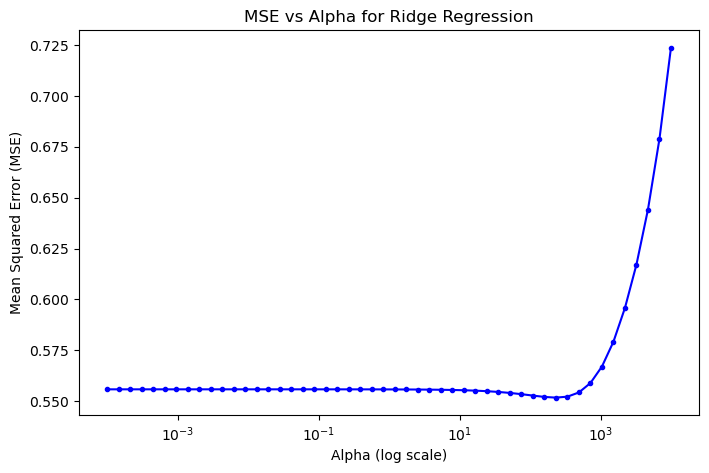

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define range of alpha values (logarithmic scale from 0.0001 to 10000)
alphas = np.logspace(-4, 4, 50)

mse_values = []

# Loop over alphas and train Ridge regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot MSE vs Alpha
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse_values, 'bo-', markersize=3)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Alpha for Ridge Regression")
plt.show()

In [48]:
best_alpha = alphas[np.argmin(mse_values)]  # Get the alpha with lowest MSE
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print(f"Optimal Alpha: {best_alpha:.4f}")
print(f"MSE with Ridge Regression: {mse_ridge:.4f}")

Optimal Alpha: 232.9952
MSE with Ridge Regression: 0.5518
